#Comparison of SVM learning algorithms in Python versus Spark for linear kernel only 

##Linear separable example
+ **Gradient descent in Python**
+ **Gradient descent in Spark**
+ **Stochastic Gradient descent in Python sklearn**
+ **Python libsvm (SMO-based)**


##Linearly inseparable example
+ **Same as for seperable data set**

#Data Generation for Linear Separable data

x1 and x2 are uniform distributed and the boundry of y is x1\*w[0]+x2\*w[1] + w[2].

In [28]:
import numpy as np
def data_generate(seperable=True):
    size = 100
    np.random.seed(0)
    x1 = np.random.uniform(-4,4,100)
    x2 = np.random.uniform(-4,4,100)
    coeff = [8,-3,2]
    b = coeff.pop()
    sd = sum([c*c for c in coeff])**0.5
    coeff.append(b)
    coeff = [c/sd for c in coeff]
    v = (x1*coeff[0]+x2*coeff[1] + coeff[2])
    y = (v>0)*2-1
    data = np.column_stack((x1,x2))
    idx = abs(v)>1
    data = data[idx,:]
    y = y[idx]
    if not seperable:
        wrongidx = np.random.choice(range(len(y)),6, replace =False )
        y[wrongidx] = -y[wrongidx]
    return data, y, coeff

In [29]:
data_sep, y_sep, w_sep = data_generate(seperable=True)

In [30]:
w_sep

[0.9363291775690445, -0.3511234415883917, 0.23408229439226114]

##Data Visualization

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_data_boundary(data, y, w, sep=True):
    cols = {1: 'r', -1: 'b'}
    for i in range(len(y)):
        plt.plot(data[i,0], data[i,1], cols[y[i]]+'o')
    plt.xlabel("x1")
    plt.ylabel("x2")
    if sep:
        plt.title('Linear Separable data: True boundary')
    else:
        plt.title('Linear Inseparable data: True boundary')
    x_b = [-4,4]
    y_b = [-(i*w[0]+w[2])/w[1]for i in x_b]
    plt.plot(x_b,y_b)
    plt.grid()
    plt.show()

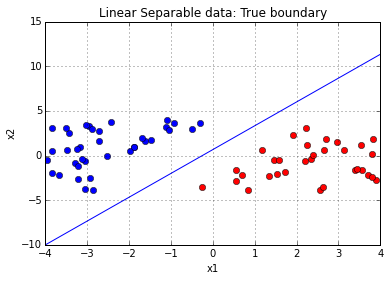

In [55]:
plot_data_boundary(data_sep, y_sep, w_sep)

##SVM-Gradient Descent

Input:
+ data: Feature Information
+ y: label information
+ eta: learning rate
+ iter_num : maximum iteration number
+ regPara: regularization parameter
+ stopCriteria: stop criteria

Output:
+ w : coeffcients of boudary 

In [33]:
#gradient descent (and with NO stochasticity!)
# Objective Function
# minw   λ/2   w’w   +   1/m Σi(1   –    yi(w’xi – b))+
# gradient 
#   λw               if      yi(w’xi – b))  > 1    #correctly classified
#   λw  + yi xi      Otherwise                    #incorrectly classified
#--------------------------------
#Wt+1  = wt + average(gradient)
#Wt+1  = wt + average(regularization + hinge loss)
def SVM_GD(data,y,w=None,eta=0.01,iter_num=1000,regPara=0.01,stopCriteria=0.0001):  
    data = np.append(data,np.ones((data.shape[0],1)),axis=1)
    if w==None:
        w = np.random.normal(size=data.shape[1])
    for i in range(iter_num):
        wxy = np.dot(data,w)*y  #labeled margin
        xy = -data*y[:,None]    
        zipv = zip(xy,wxy)
        # Gradient of hinge loss: if wxy<0 then hinge loss is xy
        g = sum([u for u,v in zipv if v<1])/data.shape[0]  #avg hinge loss
        wreg = w*1  #weight vector
        wreg[-1] = 0
        #wreg = np.array([w[0],w[1],0])
        wdelta = eta*(g+regPara*wreg)
        if sum(abs(wdelta))<=stopCriteria*sum(abs(w)):
            break
        w = w - wdelta
    return w

In [35]:
np.random.seed(400)
w_gd_sep = SVM_GD(data_sep,y_sep)
print w_gd_sep

[ 0.93510664 -0.31799796  0.10234458]


**How does w converge?**

In [38]:
def plot_iteration(data,y,w_true):
    plt.figure(figsize=(10,10))
    cols = {1: 'r', -1: 'b'}
    for i in range(len(y)):
        plt.plot(data[i,0], data[i,1], cols[y[i]]+'o')
    plt.xlabel("x1",fontsize=20)
    plt.ylabel("x2",fontsize=20)
    plt.title('Weights Convergence for Gradient Descent',fontsize=20)
    x_b = [-4,4]

    y_b = [-(i*w_true[0]+w_true[2])/w_true[1]for i in x_b]
    plt.plot(x_b,y_b,'r--',label = "True Boundary", linewidth=4.0)  

    np.random.seed(800)
    wgd = np.random.normal(size=data.shape[1]+1)
    y_b = [-(i*wgd[0]+wgd[2])/wgd[1] for i in x_b]
    plt.plot(x_b,y_b,color ='r',label = "0 Iterations")

    wgd = SVM_GD(data,y,wgd,iter_num=50)
    y_b = [-(i*wgd[0]+wgd[2])/wgd[1] for i in x_b]
    plt.plot(x_b,y_b,color ='g',label = "50 Iterations")

    wgd = SVM_GD(data,y,wgd,iter_num=50)
    y_b = [-(i*wgd[0]+wgd[2])/wgd[1] for i in x_b]
    plt.plot(x_b,y_b,color ='b',label = "100 Iterations")

    wgd = SVM_GD(data,y,wgd,iter_num=50)
    y_b = [-(i*wgd[0]+wgd[2])/wgd[1] for i in x_b]
    plt.plot(x_b,y_b,color ='y',label = "150 Iterations")

    wgd = SVM_GD(data,y,wgd,iter_num=50)
    y_b = [-(i*wgd[0]+wgd[2])/wgd[1] for i in x_b]
    plt.plot(x_b,y_b,color ='m',label = "200 Iterations")

    wgd = SVM_GD(data,y,wgd,iter_num=200)
    y_b = [-(i*wgd[0]+wgd[2])/wgd[1] for i in x_b]
    plt.plot(x_b,y_b,color ='c',label = "400 Iterations")

    wgd = SVM_GD(data,y,wgd,iter_num=200)
    y_b = [-(i*wgd[0]+wgd[2])/wgd[1] for i in x_b]
    plt.plot(x_b,y_b, 'c--',label = "600 Iterations", linewidth=4.0)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=20,borderaxespad=0.)
    plt.grid()
    plt.show()

/Users/liang/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  app.launch_new_instance()


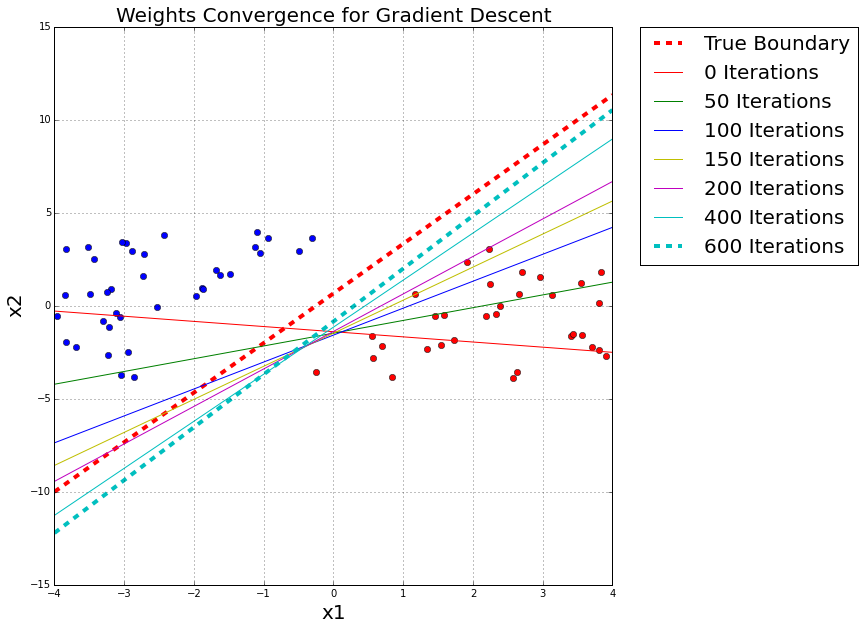

In [39]:
plot_iteration(data_sep,y_sep,w_sep)

##SVM-Gradient Descent-Spark

In [1]:
import os
import sys

#set up Spark and give us a spark contect sc
#NativeX laptop
spark_home = os.environ['SPARK_HOME']='/Users/james.shanahan/Dropbox/NativeX-Internal/Publications/2014-07-02-Spark-Summit/spark/'
spark_home = os.environ['SPARK_HOME']='/Users/jshanahan/Dropbox/Lectures-UC-Berkeley-ML-Class-2015/spark-1.4.0-bin-hadoop2.6/'
if not spark_home:
    raise ValueError('SPARK_HOME environment variable is not set')
#spark_home = os.environ['SPARK_HOME']='/Users/jshanahan/Software/spark-1.2.1-bin-hadoop2.4/'  #desktop

sys.path.insert(0, os.path.join(spark_home, 'python'))
sys.path.insert(0, os.path.join(spark_home, 'python/lib/py4j-0.8.2.1-src.zip'))
print "spark home "+ spark_home
print "spark home zip "+ os.path.join(spark_home, 'python/lib/py4j-0.8.2.1-src.zip')
execfile(os.path.join(spark_home, 'python/pyspark/shell.py'))
#sc.stop()

spark home /Users/jshanahan/Dropbox/Lectures-UC-Berkeley-ML-Class-2015/spark-1.4.0-bin-hadoop2.6/
spark home zip /Users/jshanahan/Dropbox/Lectures-UC-Berkeley-ML-Class-2015/spark-1.4.0-bin-hadoop2.6/python/lib/py4j-0.8.2.1-src.zip
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 1.4.0
      /_/

Using Python version 2.7.9 (default, Dec 15 2014 10:37:34)
SparkContext available as sc, HiveContext available as sqlContext.


In [4]:
#Example 4-1. Creating a pair RDD using the first word as the key in Python

lines = sc.parallelize(["ERROR Data line 1", "ERROR Mining line 2", "data line 3", "Data line 4", "Data Mining line 5"])
tokens = lines.filter(lambda x: 'ERROR' in x) \
            .map(lambda line: line.split(" ")[1]) #second word and the original line
#pairs = lines.map(lambda x: (x.split(" ")[0], x))  #first word and the original line
tokens.collect()

['Data', 'Mining']

In [5]:
lines = sc.parallelize(["Data line 1", "Mining line 2", "data line 3", "Data line 4", "Data Mining line 5"])
counts = lines.flatMap(lambda line: line.split(" ")) \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b)
        
counts.collect()

[('1', 1),
 ('line', 5),
 ('Mining', 2),
 ('3', 1),
 ('2', 1),
 ('data', 1),
 ('5', 1),
 ('Data', 3),
 ('4', 1)]

In [7]:
counts.toDebugString()

'(8) PythonRDD[7] at collect at <ipython-input-5-708c6b1f0496>:4 []\n |  MapPartitionsRDD[6] at mapPartitions at PythonRDD.scala:346 []\n |  ShuffledRDD[5] at partitionBy at NativeMethodAccessorImpl.java:-2 []\n +-(8) PairwiseRDD[4] at reduceByKey at <ipython-input-5-708c6b1f0496>:2 []\n    |  PythonRDD[3] at reduceByKey at <ipython-input-5-708c6b1f0496>:2 []\n    |  ParallelCollectionRDD[2] at parallelize at PythonRDD.scala:396 []'

In [2]:
#gradient descent (and with NO stochasticity!)
# Objective Function
# minw   λ/2   w’w   +   1/m Σi(1   –    yi(w’xi – b))+
# gradient 
#   λw               if      yi(w’xi – b))  > 1    #correctly classified
#   λw  + yi xi      Otherwise                    #incorrectly classified
#--------------------------------
#Wt+1  = wt + average(gradient)
#Wt+1  = wt + average(regularization + hinge loss)

def SVM_GD_SPARK(data,y,w=None,eta=0.01,iter_num=1000,regPara=0.01,stopCriteria=0.0001):
    #eta learning rate
    #regPara
    dataRDD = sc.parallelize(np.append(y[:,None],data,axis=1)).cache() #prepend y to X
    if w==None:
        w = np.random.normal(size=data.shape[1]+1)
    for i in range(iter_num):       #label * margin
        sv = dataRDD.filter(lambda x:x[0]*np.dot(w,np.append(x[1:],1))<1)  #Support vector? with label*margin<1
        if sv.isEmpty(): # converged as no more updates possible
            break       # hinge loss compoent of gradient y*x and sum up 
        g = -sv.map(lambda x:x[0]*np.append(x[1:],1)).reduce(lambda x,y:x+y)/data.shape[0] #gradient: avg hinge loss
        wreg = w*1   #temp copy of weight vector
        wreg[-1] = 0 #last value of weight vector is bias term; ignore in regularization
        wdelta = eta*(g+regPara*wreg)  #gradient: hinge loss + regularized term 
        if sum(abs(wdelta))<=stopCriteria*sum(abs(w)): # converged as updates to weight vector are small
            break
        w = w - wdelta
    return w

In [49]:
np.random.seed(400)
w_gd_spark_sep = SVM_GD_SPARK(data_sep,y_sep)
print w_gd_spark_sep

array([ 0.93510664, -0.31799796,  0.10234458])

##SVM-AdadronLearner

Input:
+ data: Feature Information
+ y: label information
+ eta: learning rate
+ iter_num : maximum iteration number
+ C: Penalty Parameter

Output:
+ w : coeffcients of boudary 
+ alpha: coeffcients for dual problem
+ minPosZ: minimum output of positive points
+ maxNegZ: maximum closed negative points

In [40]:
def AdadronLearn(data,y,eta,iter_num,C=float('inf')):   #default is a hard svm
    alpha = [1]*len(y)
    gamma = alpha[:]  #intermediate results;  margin_i*y_i
    delta_alpha = alpha[:] 
    z = alpha[:]      #perpendicular dist to separating hyperplane
    b = 0
    norm = 1
    
    for k in range(iter_num):
        minPosZ = float('inf')
        maxNegZ = float('-inf')
        #Stop if data points are perfectly seperated or run iter_num times
        if ((minPosZ>maxNegZ-2*norm) and minPosZ!=float('inf') and maxNegZ != float('-inf')) or k==iter_num-1:
            return w,alpha,minPosZ,maxNegZ   #EXIT
        for i in range(len(y)):
            #calculate margin; calculated using weighted sum of support vectors
            z[i] = sum(alpha*y*np.dot(data[i,:],data.T)) 
            
            #Update min and max margin
            if(y[i]==1 and z[i]<minPosZ):
                minPosZ = z[i]
            elif(y[i]==-1 and z[i]>maxNegZ):
                maxNegZ = z[i]
            
            #Update the gradient
            gamma[i] = z[i]*y[i]                 #margin
            delta_alpha[i] = eta*(1-gamma[i])    #learning rate times the gradient
            alpha[i] = alpha[i] + delta_alpha[i] #update alphas
            
            #Clip alpha if it is out of [0,C]
            if(alpha[i]<0):
                alpha[i] = 0
            elif(alpha[i]>C):
                alpha[i] = C
                
        b = 0.5* (minPosZ+maxNegZ)  #bias
        w = np.dot((alpha*y).reshape(1,len(y)),data)[0]  #recover primal weight vector
        norm = sum([c*c for c in w])**0.5  
        w = w.tolist()
        w.append(b)

In [41]:
w_soft_adatron_sep,alpha_s,minPosZ_s,maxNegZ_s = AdadronLearn(data_sep,y_sep,0.01,5000,80)
w_hard_adatron_sep,alpha_h,minPosZ_h,maxNegZ_h = AdadronLearn(data_sep,y_sep,0.01,5000,float('inf'))

#NOTE:
##Distributed Kernel Adatron (in say Spark) is not a good idea (algorithm is sequential in nature



##SVM-Scikit-Learn-SGD

In [43]:
from sklearn import linear_model
clf = linear_model.SGDClassifier()
clf.fit(data_sep, y_sep)
w = np.append(clf.coef_,clf.intercept_)
w_sklearn_sk_sgd_sep = w/np.linalg.norm(clf.coef_)

##SVM-Scikit-Learn-SGD_LibSVM

In [48]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(data_sep, y_sep)
w = np.append(clf.coef_,clf.intercept_)
w_sklearn_libsvm_sep = w/np.linalg.norm(clf.coef_)

##Comparison Plot for linear separable data

In [56]:
def comparison_plot(data,y,w,w_sklearn_libsvm,w_gd,w_h,w_s,sep=True):
    plt.figure(figsize=(10,10))
    cols = {1: 'r', -1: 'b'}
    for i in range(len(y)):
        plt.plot(data[i,0], data[i,1], cols[y[i]]+'o')
    plt.xlabel("x1",fontsize=20)
    plt.ylabel("x2",fontsize=20)
    if sep:
        plt.title('Comparison for linearly separable data',fontsize=20)
    else:
        plt.title('Comparison for linearly inseparable data',fontsize=20)
    x_b = [-4,4]
    
    y_b = [-(i*w_sklearn_libsvm[0]+w_sklearn_libsvm[2])/w_sklearn_libsvm[1]for i in x_b]
    plt.plot(x_b,y_b,'y',label = "SK-learner-libSVM") 

    y_b = [-(i*w_gd[0]+w_gd[2])/w_gd[1]for i in x_b]
    plt.plot(x_b,y_b,'c',label = "Gradient Descent") 

    y_b = [-(i*w[0]+w[2])/w[1]for i in x_b]
    plt.plot(x_b,y_b,'b--',label = "True Boundary", linewidth=4.0)  

    y_b = [-(i*w_h[0]+w_h[2])/w_h[1]for i in x_b]
    plt.plot(x_b,y_b,'r--',label = "Hard Adatron", linewidth=4.0) 

    y_b = [-(i*w_s[0]+w_s[2])/w_s[1]for i in x_b]
    plt.plot(x_b,y_b,'r',label = "Soft Adatron", )

    #y_b = [-(i*w_sklearn_1[0]+w_sklearn_1[2])/w_sklearn_1[1]for i in x_b]
    #plt.plot(x_b,y_b,'m',label = "SK-learner-Primal-SGD") 

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2,fontsize=20, borderaxespad=0.)
    plt.grid()
    plt.show()

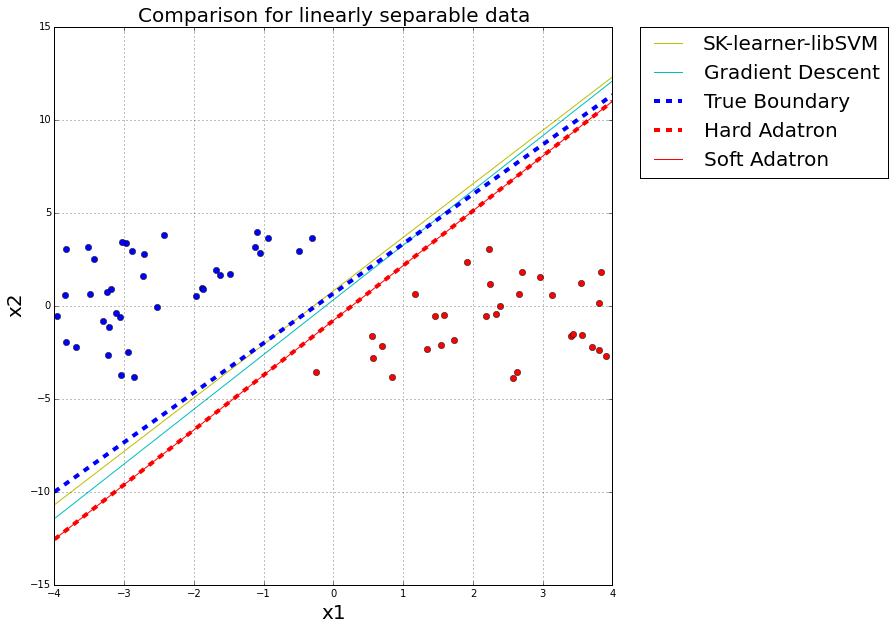

In [57]:
comparison_plot(data_sep,y_sep,w_sep,w_sklearn_libsvm_sep,w_gd_sep,w_hard_adatron_sep,w_soft_adatron_sep)

##Data Generation for linear inseparable data

x1 and x2 are uniform distributed and the boundry of y is x1\*coeff[0]+x2\*coeff[1] + coeff[2].

In [50]:
data_insep, y_insep, w_insep = data_generate(seperable=False)

##Data Visualization

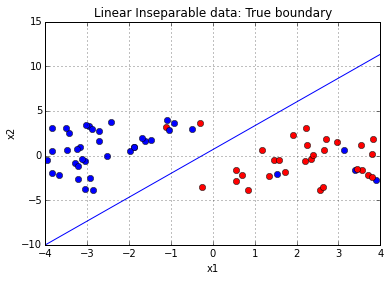

In [58]:
plot_data_boundary(data_insep, y_insep, w_insep,sep=False)

##SVM-Gradient Descent

In [59]:
np.random.seed(400)
w_gd_insep = SVM_GD(data_insep,y_insep)
print w_gd_insep

[ 0.56222253 -0.12796283  0.11234458]


**How does w converge?**

/Users/liang/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  app.launch_new_instance()


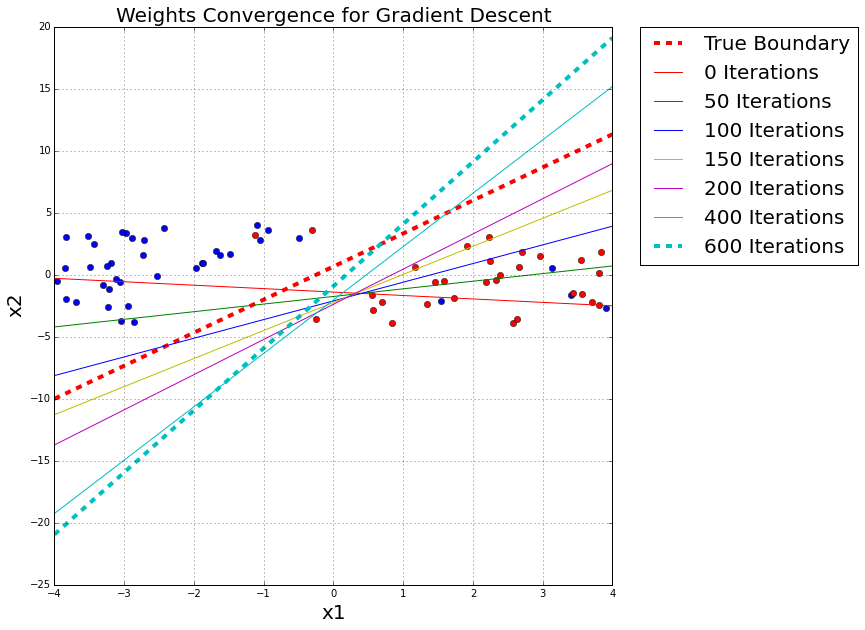

In [61]:
plot_iteration(data_insep,y_insep,w_insep)

##SVM-Gradient Descent-Spark

In [61]:
np.random.seed(400)
w_gd_spark_insep = SVM_GD_SPARK(data_insep,y_insep)
print w_gd_spark_insep

array([ 0.56222253, -0.12796283,  0.11234458])

##SVM-AdadronLearner

In [62]:
w_soft_adatron_insep,alpha_s,minPosZ_s,maxNegZ_s = AdadronLearn(data_insep,y_insep,0.01,5000,80)
w_hard_adatron_insep,alpha_h,minPosZ_h,maxNegZ_h = AdadronLearn(data_insep,y_insep,0.01,5000,float('inf'))

##SVM-Scikit-Learn-SGD

In [63]:
from sklearn import linear_model
clf = linear_model.SGDClassifier()
clf.fit(data_insep, y_insep)
w = np.append(clf.coef_,clf.intercept_)
w_sklearn_sk_sgd_insep = w/np.linalg.norm(clf.coef_)

##SVM-Scikit-Learn-SGD_LibSVM

In [66]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(data_insep, y_insep)
w = np.append(clf.coef_,clf.intercept_)
w_sklearn_libsvm_insep = w/np.linalg.norm(clf.coef_)

##Comparison linear inseparable Plot

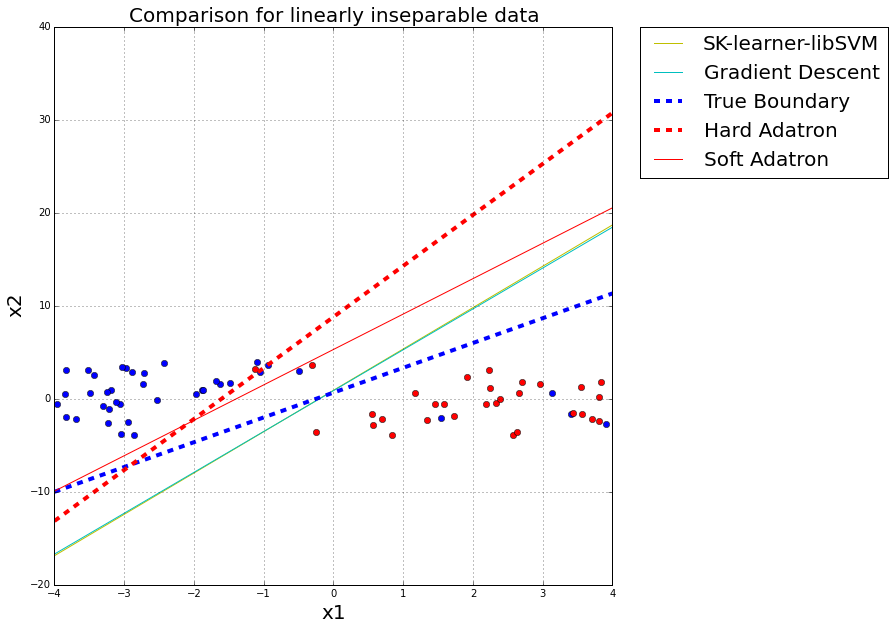

In [67]:
comparison_plot(data_insep,y_insep,w_insep,w_sklearn_libsvm_insep,w_gd_insep,w_hard_adatron_insep,
                w_soft_adatron_insep,sep=False)